# Assignment 4
## Part 1: Data preparation
### Step 1: Import MNIST

In [5]:
from mnist.loader import MNIST
import numpy as np

mndata = MNIST('./MNIST')
X_train, y_train = mndata.load_training()
X_test, y_test = mndata.load_testing()

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

In [6]:
# check if dataset is full
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


### Step 2: Get classes 3 and 9

In [7]:
from matplotlib import pyplot as plt

# to segment the classes we would like to use
train_idx = np.where((y_train == 3) | (y_train == 9))
test_idx = np.where((y_test == 3) | (y_test == 9))

X_train, y_train = X_train[train_idx], y_train[train_idx]
X_test, y_test = X_test[test_idx], y_test[test_idx]

In [8]:
# check sliced datasets
print("Training set: X of size {0}, y of size {1}".format(X_train.shape, y_train.shape))
print("Test set: X of size {0}, y of size {1}".format(X_test.shape, y_test.shape))

Training set: X of size (12080, 784), y of size (12080,)
Test set: X of size (2019, 784), y of size (2019,)


### Step 3: Some checks

Some sample images:


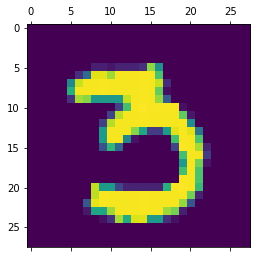

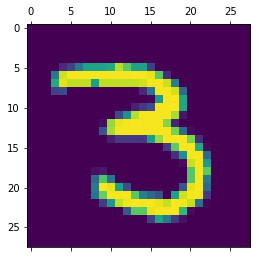

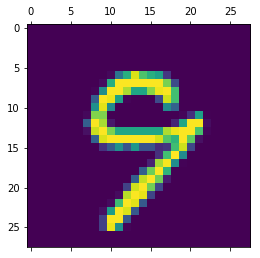

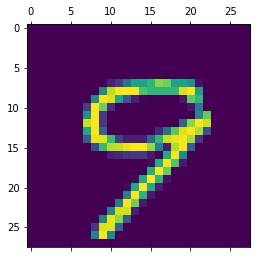

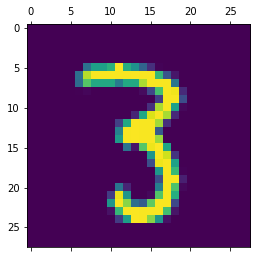

In [9]:
# plotting some examples
print("Some sample images:")
rnd_idx = np.random.randint(len(y_train), size=5)
for idx in rnd_idx:
    plt.matshow(X_train[idx].reshape(28, 28))

In [10]:
for num in [3, 9]:
    print("How many datapoints in class {0}?".format(num), sum(y_train == num))

How many datapoints in class 3? 6131
How many datapoints in class 9? 5949


Classes are pretty even so we can get reasonable conclusions from accuracy.

## Part 2: Validation metrics

### Step 1: Error rate

In [13]:
from sklearn.metrics import accuracy_score

def eval_err(model, X_test, y_test):
    pred = model.predict(X_test)
    err_rate = 1 - accuracy_score(y_test, pred)
    
    return err_rate

### Step 2: Grid search for best parameter

In [14]:
import time

def grid_search(model, X_train, y_train, X_test, y_test, hyperparams):
    best_err = 1
    best_params = 'default'
    krnl = model.kernel

    if krnl in ['linear', 'rbf', 'poly']:
        for C in hyperparams['C']:
            for gamma in hyperparams['gamma']:
                 for deg in hyperparams['degree']:
                    model.degree = deg if krnl == 'poly' else 1
                    model.C = C
                    model.gamma = gamma if krnl == 'rbf' else 'auto'
                    
                    print("Params deg={0}, C={1}, gamma={2}".format(deg, C, gamma))
                    start = time.time()
                    model.fit(X_train, y_train)
                    end = time.time()
                    print("Training time:", '%.2f'%(end - start), "sec")

                    err = eval_err(model, X_test, y_test)
                    print("Error rate:", '%.5f'%err)
                    print() # new line
                    
                    if err < best_err:
                        best_err = err
                        best_params = {
                            'degree': deg,
                            'C': C,
                            'gamma': gamma
                        }
    else:
        print("This kernel is not for assignment :)")
        return -1
    
    return best_params, best_err

### Step 3: Output best result

In [15]:
def best_res(model, best_err):
    krnl = model.kernel
    print("Best result achieved by {0} kernel is the error rate of {1}!".format(krnl, '%5f'%best_err))

## Part 3: Fitting models

In [3]:
from sklearn import svm

### Step 1: SVM with linear kernel

In [148]:
grid_params_linear = {
    'C': [0.01, 0.1, 1, 10],
    'gamma': ['auto'],
    'degree': [1]
}


clf_linear = svm.SVC(kernel='linear')
params_linear, err_linear = grid_search(clf_linear, X_train, y_train, X_test, y_test, hyperparams=grid_params_linear)

Params deg=1, C=0.01, gamma=auto
Training time: 17.13 sec
Error rate: 0.02526

Params deg=1, C=0.1, gamma=auto
Training time: 16.68 sec
Error rate: 0.02526

Params deg=1, C=1, gamma=auto
Training time: 14.74 sec
Error rate: 0.02526

Params deg=1, C=10, gamma=auto
Training time: 15.56 sec
Error rate: 0.02526



In [157]:
best_res(clf_linear, err_linear)

Best result achieved by linear kernel is the error rate of 0.025260!


### Step 2: SVM with polynomial kernel

In [149]:
grid_params_poly = {
    'C': [0.01, 0.1, 1, 10],
    'gamma': ['auto'],
    'degree': [1, 2, 3, 4, 5]
}


clf_poly = svm.SVC(kernel='poly', degree=3, gamma='scale')
params_poly, err_poly = grid_search(clf_poly, X_train, y_train, X_test, y_test, hyperparams=grid_params_poly)

Params deg=1, C=0.01, gamma=auto
Training time: 11.11 sec
Error rate: 0.01238

Params deg=2, C=0.01, gamma=auto
Training time: 8.08 sec
Error rate: 0.00594

Params deg=3, C=0.01, gamma=auto
Training time: 7.53 sec
Error rate: 0.00594

Params deg=4, C=0.01, gamma=auto
Training time: 7.67 sec
Error rate: 0.00743

Params deg=5, C=0.01, gamma=auto
Training time: 8.39 sec
Error rate: 0.00792

Params deg=1, C=0.1, gamma=auto
Training time: 13.87 sec
Error rate: 0.01634

Params deg=2, C=0.1, gamma=auto
Training time: 7.49 sec
Error rate: 0.00594

Params deg=3, C=0.1, gamma=auto
Training time: 8.12 sec
Error rate: 0.00594

Params deg=4, C=0.1, gamma=auto
Training time: 8.76 sec
Error rate: 0.00743

Params deg=5, C=0.1, gamma=auto
Training time: 9.16 sec
Error rate: 0.00792

Params deg=1, C=1, gamma=auto
Training time: 15.39 sec
Error rate: 0.02377

Params deg=2, C=1, gamma=auto
Training time: 7.23 sec
Error rate: 0.00594

Params deg=3, C=1, gamma=auto
Training time: 7.30 sec
Error rate: 0.0059

In [159]:
best_res(clf_poly, err_poly)

Best result achieved by poly kernel is the error rate of 0.005944!


### Step 3: SVM with radial-basis function kernel

In [15]:
grid_params_rbf = {
    'C': [0.01, 0.1, 1],
    'gamma': [0.01, 0.1, 1, 10],
    'degree': [1]
}

clf_rbf = svm.SVC(kernel='rbf', C=1, gamma='scale')
params_rbf, err_rbf = grid_search(clf_rbf, X_train, y_train, X_test, y_test, hyperparams=grid_params_rbf)

Params deg=1, C=0.01, gamma=0.01
Training time: 163.63 sec
Error rate: 0.49975

Params deg=1, C=0.01, gamma=0.1
Training time: 173.63 sec
Error rate: 0.49975

Params deg=1, C=0.01, gamma=1
Training time: 188.92 sec
Error rate: 0.49975

Params deg=1, C=0.01, gamma=10
Training time: 162.78 sec
Error rate: 0.49975

Params deg=1, C=0.1, gamma=0.01
Training time: 229.65 sec
Error rate: 0.49975

Params deg=1, C=0.1, gamma=0.1
Training time: 225.45 sec
Error rate: 0.49975

Params deg=1, C=0.1, gamma=1
Training time: 226.64 sec
Error rate: 0.49975

Params deg=1, C=0.1, gamma=10
Training time: 227.68 sec
Error rate: 0.49975

Params deg=1, C=1, gamma=0.01
Training time: 312.05 sec
Error rate: 0.49975

Params deg=1, C=1, gamma=0.1
Training time: 325.54 sec
Error rate: 0.49975

Params deg=1, C=1, gamma=1
Training time: 364.55 sec
Error rate: 0.49975

Params deg=1, C=1, gamma=10
Training time: 376.38 sec
Error rate: 0.49975



In [20]:
best_res(clf_rbf, err_rbf)

Best result achieved by rbf kernel is the error rate of 0.499752!
